In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
dataset.drop('Id', inplace=True, axis=1)

In [12]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
X = dataset.iloc[:, [0,1,2,3]].values
y = dataset.iloc[:, 4].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='auto',n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(random_state=0)

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)

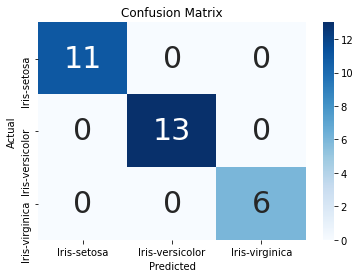

In [29]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
import seaborn as sns
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax, xticklabels=class_names, yticklabels=class_names)
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [32]:
ac_sc = accuracy_score(y_test, y_pred)
rc_sc = recall_score(y_test, y_pred, average="weighted")
pr_sc = precision_score(y_test, y_pred, average="weighted")
f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0
Confusion Matrix: 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
